In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from glob import glob
import os
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [3]:
df_member = pd.read_csv('/content/df_member4.csv')
df1 = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/product_data_001.csv')
df2 = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/product_data_002.csv')
df3 = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/product_data_003.csv')
df4 = pd.read_csv('/content/drive/MyDrive/디엠씨코넷/머신러닝/팀미션/product_data_004.csv')
df = pd.concat([df1,df2,df3,df4]).reset_index(drop=True)

In [4]:
df_k = df_member[df_member['조합원상태'] == '정상회원'].drop(columns=['Unnamed: 0'])

In [5]:
df_k

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,방문텀2,마지막방문일2,선호요일,선호방문시간,구매매장,고객등급
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,0,139,Monday,16.0,매장B,1
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,0,18,Wednesday,13.0,매장C,4
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,13,0,Friday,14.0,매장B,4
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,11,0,Friday,11.0,매장A,4
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,9,25,Friday,14.0,매장C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549,999654592,정상회원,기타-기타,여,47.0,미신청,미수신,normal,1,33387,33387.000000,3.000000,40대,0,292,Tuesday,15.0,매장C,5
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,28,40,Sunday,16.0,매장A,4
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,29,13,Friday,14.0,매장B,3
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,13,9,Friday,17.0,매장B,2


In [6]:
df['공급일자'] = pd.to_datetime(df['공급일자'])
df['구매시각'] = pd.to_datetime(df['구매시각'], format='%H:%M').dt.hour
df['반품_원거래일자'] = pd.to_datetime(df['반품_원거래일자'], errors='coerce')

In [7]:
merged_data = pd.merge(df, df_member, on='회원번호', how='left')

In [8]:
merged_data['총구매금액'] = merged_data['구매금액'] * merged_data['구매수량']
merged_data['구매연도'] = merged_data['공급일자'].dt.year
merged_data['구매월'] = merged_data['공급일자'].dt.month
merged_data['구매일'] = merged_data['공급일자'].dt.day
merged_data['구매요일'] = merged_data['공급일자'].dt.day_name()


In [9]:
merged_data['모바일알람여부'].replace('.','미수신', inplace=True)

In [10]:
merged_data.columns

Index(['공급일자', '회원번호', '조합원상태_x', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장_x', '반품_원거래일자', '구매시각', 'Unnamed: 0', '조합원상태_y', '주소',
       '성별', '연령', '배송서비스신청여부', '모바일알람여부', 'Gold_member', '총구매횟수', '총구매금액',
       '1회평균구매금액', '1회평균구매수량', '연령대', '방문텀2', '마지막방문일2', '선호요일', '선호방문시간',
       '구매매장_y', '고객등급', '구매연도', '구매월', '구매일', '구매요일'],
      dtype='object')

In [11]:
customer_purchase_summary = merged_data.groupby('회원번호').agg({
    '총구매금액': 'sum',
    '구매수량': 'sum',
    '물품중분류': lambda x: list(x),
    '연령': 'first',
    '성별': 'first',
    '주소': 'first'
}).reset_index()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [16]:
df_k.to_csv('df_k.csv')

In [14]:
X = df_k.iloc[:,2:]
len(X), len(df_k)

(11413, 11413)

In [15]:
X.dropna(inplace=True)
df_k.dropna(inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.describe(include='object').columns:
    X[col] = le.fit_transform(X[col])

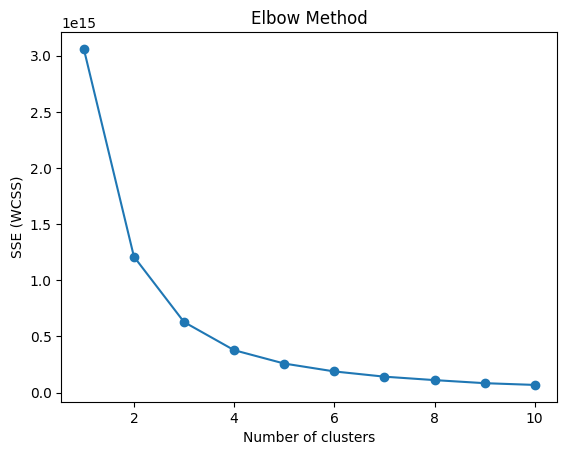

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 생성
from sklearn.datasets import make_blobs
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 비용 함수 값 계산
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 시각화
plt.plot(range(1, 11, 1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (WCSS)')
plt.title('Elbow Method')
plt.show()


In [18]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
# X = df_member4[['주소','성별','연령','배송서비스신청여부','모바일알람여부','Gold_member','총구매횟수','총구매금액','1회평균구매금액','1회평균구매수량','연령대','방문텀2','마지막방문일2','선호요일','선호방문시간']]
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in X.describe(include='object').columns:
#     X[col] = le.fit_transform(X[col])
X.dropna(inplace=True)
# K-평균 알고리즘 적용
kmeans = KMeans(n_clusters=4)
kmeans.fit(X.iloc[:,2:])
y_kmeans = kmeans.predict(X.iloc[:,2:])

# 군집 중심
centers = kmeans.cluster_centers_

# 각 데이터 포인트에 대한 군집 레이블
labels = kmeans.labels_

In [19]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score



# X = X.dropna(inplace=True)
# K-평균 군집화
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X.iloc[:,2:])
kmeans_labels = kmeans.predict(X.iloc[:,2:])
kmeans_silhouette_score = silhouette_score(X.iloc[:,2:], kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")

# # DBSCAN 군집화
# dbscan = DBSCAN(eps=0.3, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X)
# dbscan_silhouette_score = silhouette_score(X, dbscan_labels)
# print(f"DBSCAN Silhouette Score: {dbscan_silhouette_score}")

# 계층적 군집화
hierarchical = AgglomerativeClustering(n_clusters=3)
# hierarchical.fit(X)
hierarchical_labels = hierarchical.fit_predict(X.iloc[:,2:])
hierarchical_silhouette_score = silhouette_score(X.iloc[:,2:], hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette_score}")

# 가장 높은 실루엣 점수를 가진 알고리즘 찾기
scores = {
    "K-Means": kmeans_silhouette_score,
    # "DBSCAN": dbscan_silhouette_score,
    "Hierarchical": hierarchical_silhouette_score
}

best_algorithm = max(scores, key=scores.get)
print(f"Best Algorithm: {best_algorithm} with Silhouette Score: {scores[best_algorithm]}")


K-Means Silhouette Score: 0.758511288365808
Hierarchical Clustering Silhouette Score: 0.7416851435847164
Best Algorithm: K-Means with Silhouette Score: 0.758511288365808


In [24]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,52.368482,0.939911,48.761298,1.655355e-04,0.055123,1.000000,2.683496,3.807705e+04,16820.788938,1.594884,3.429399,21.229101,115.120013,1.915908e+00,14.404238,1.441483,3.812283
1,67.090909,0.945455,53.600000,4.163336e-17,0.654545,0.309091,103.254545,3.354847e+06,37212.302413,2.844237,3.890909,2.818182,1.727273,-2.220446e-16,13.763636,1.036364,2.000000
2,64.790497,0.939525,51.956803,3.110151e-01,0.252700,0.933045,43.673866,1.033063e+06,27447.411936,2.255046,3.747300,7.071274,7.768898,3.455724e-02,13.887689,1.269978,2.000000
3,61.790221,0.944795,51.037855,3.328076e-01,0.041798,0.997634,20.516562,3.975823e+05,25488.741276,1.970841,3.650631,14.587539,20.797319,1.388013e-01,14.240536,1.331230,2.549685
4,65.627737,0.934307,52.897810,-8.326673e-17,0.635036,0.605839,80.051095,2.279833e+06,31982.321828,2.581011,3.868613,3.627737,3.751825,1.459854e-02,13.817518,1.087591,2.000000
5,70.000000,1.000000,51.500000,0.000000e+00,1.000000,0.000000,167.500000,9.281110e+06,55446.815775,3.018538,4.000000,1.000000,0.000000,0.000000e+00,15.000000,2.000000,2.000000
6,67.880000,0.920000,55.080000,-1.387779e-17,0.680000,0.240000,119.760000,5.008226e+06,49898.553971,3.069421,4.080000,2.360000,2.160000,2.220446e-16,13.760000,0.920000,2.000000
7,59.411195,0.946970,49.764310,7.996633e-03,0.024832,1.000000,10.303872,1.827543e+05,26068.218952,1.848361,3.521044,23.859428,42.885522,4.675926e-01,14.372054,1.378367,3.330808
8,62.644993,0.941482,50.682705,5.708713e-01,0.117035,0.981795,30.996099,6.692931e+05,25607.331209,2.117295,3.611183,9.898570,13.386216,3.771131e-02,14.170351,1.339402,2.000000
9,63.839416,0.952555,52.536496,4.014599e-02,0.368613,0.839416,56.313869,1.533844e+06,31709.306694,2.465168,3.802920,5.423358,5.343066,1.459854e-02,13.766423,1.178832,2.000000


In [20]:
df_k['군집'] = kmeans_labels
df_k

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,총구매횟수,총구매금액,1회평균구매금액,1회평균구매수량,연령대,방문텀2,마지막방문일2,선호요일,선호방문시간,구매매장,고객등급,군집
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,1,7658,7658.000000,1.000000,50대,0,139,Monday,16.0,매장B,1,1
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,1,36948,36948.000000,6.000000,30대,0,18,Wednesday,13.0,매장C,4,1
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,15,142831,9522.066667,1.466667,30대,13,0,Friday,14.0,매장B,4,1
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,4,138892,34723.000000,2.000000,70대,11,0,Friday,11.0,매장A,4,1
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,28,592543,21162.250000,1.607143,40대,9,25,Friday,14.0,매장C,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549,999654592,정상회원,기타-기타,여,47.0,미신청,미수신,normal,1,33387,33387.000000,3.000000,40대,0,292,Tuesday,15.0,매장C,5,1
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,3,39820,13273.333333,1.000000,40대,28,40,Sunday,16.0,매장A,4,1
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,9,152960,16995.555556,1.666667,60대,29,13,Friday,14.0,매장B,3,1
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,21,641334,30539.714286,2.285714,40대,13,9,Friday,17.0,매장B,2,0


In [21]:
df_k.to_csv('df_k.csv')

In [ ]:
merge_df2 = pd.merge(merged_data,df_k[['회원번호','군집']],on='회원번호',how='left')

In [ ]:
merged_data

In [ ]:
!pip install surprise

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merge_df2[['군집', '물품소분류', '구매수량']], reader)

# 데이터셋을 학습 세트와 테스트 세트로 분할
trainset, testset = train_test_split(data, test_size=0.2)

# SVD 알고리즘 사용
algo = SVD()

# 학습 세트로 알고리즘 학습
algo.fit(trainset)

# 테스트 세트로 예측 수행
predictions = algo.test(testset)

# RMSE 출력
accuracy.rmse(predictions)

# 특정 고객에게 상위 N개 추천을 제공하는 함수
def get_top_n_recommendations(customer_id, n=10):
    # 모든 항목(물품중분류)의 리스트 가져오기
    all_items = merged_data['물품소분류'].unique()

    # 고객이 이미 구매한 항목의 리스트 가져오기
    purchased_items = merge_df2[merge_df2['군집'] == customer_id]['물품소분류'].unique()

    # 고객이 아직 구매하지 않은 모든 항목에 대한 예측 수행
    predictions = [algo.predict(customer_id, item) for item in all_items if item not in purchased_items]

    # 예측 결과를 추정 평점 기준으로 정렬
    predictions.sort(key=lambda x: x.est, reverse=True)

    # 상위 N개 추천 항목 추출
    top_n_recommendations = [pred.iid for pred in predictions[:n]]

    return top_n_recommendations

# 샘플 고객에 대한 상위 10개 추천 항목 가져오기
sample_customer_id = df_k[df_k['회원번호'] ==1000012800]['군집'][0]
top_n_recommendations = get_top_n_recommendations(sample_customer_id, n=10)
top_n_recommendations

In [ ]:
df_k[df_k['회원번호'] ==1000012800]['군집'][0]

In [ ]:
merged_data['총구매금액'] = merged_data['구매금액'] * merged_data['구매수량']

# 고객별 총 구매 금액 계산
customer_sales = merged_data.groupby('회원번호')['구매금액'].sum().reset_index()

# 고객당 평균 매출 계산
average_sales_per_customer = customer_sales['구매금액'].mean()
print(f"고객당 평균 매출: {average_sales_per_customer:.2f} 원")

def predict_revenue_increase(new_customers, average_sales):
    """
    신규 고객 수와 고객당 평균 매출을 기반으로 예상 매출 증가액을 예측합니다.

    Parameters:
    new_customers (int): 신규 고객 수
    average_sales (float): 고객당 평균 매출

    Returns:
    float: 예상 매출 증가액
    """
    expected_revenue_increase = new_customers * average_sales
    return expected_revenue_increase

# 신규 고객 수 입력
new_customers = 100  # 예를 들어 100명의 신규 고객

# 예상 매출 증가액 계산
expected_revenue_increase = predict_revenue_increase(new_customers, average_sales_per_customer)
print(f"예상 매출 증가액: {expected_revenue_increase:.2f} 원")

In [ ]:
merged_data

In [ ]:
merged_data['총구매금액'] = merged_data['구매금액'] * merged_data['구매수량']

# 모바일 알람 여부에 따른 매출 분석
alarm_yes = merged_data[merged_data['모바일알람여부'] == '수신']
alarm_no = merged_data[merged_data['모바일알람여부'] != '수신']

# 모바일 알람 신청 고객의 평균 매출
average_sales_alarm_yes = alarm_yes.groupby('회원번호')['구매금액'].sum().mean()

# 모바일 알람 미신청 고객의 평균 매출
average_sales_alarm_no = alarm_no.groupby('회원번호')['구매금액'].sum().mean()

print(f"모바일 알람 신청 고객의 평균 매출: {average_sales_alarm_yes:.2f} 원")
print(f"모바일 알람 미신청 고객의 평균 매출: {average_sales_alarm_no:.2f} 원")

def predict_sales_increase_by_alarm_change(current_status, average_sales_yes, average_sales_no):
    """
    모바일 알람 신청 여부 변경에 따른 매출 증가를 예측합니다.

    Parameters:
    current_status (str): 현재 모바일 알람 신청 여부
    average_sales_yes (float): 모바일 알람 신청 고객의 평균 매출
    average_sales_no (float): 모바일 알람 미신청 고객의 평균 매출

    Returns:
    float: 예측된 매출 증가액
    """
    if current_status != '수신':
        sales_increase = average_sales_yes - average_sales_no
    else:
        sales_increase = 0.0
    return sales_increase

# 특정 고객의 현재 모바일 알람 신청 여부 확인 (예: 고객번호 1000012800)
current_status = merged_data[merged_data['회원번호'] == 1000012800]['모바일알람여부'].iloc[0]

# 매출 증가 예측
predicted_increase = predict_sales_increase_by_alarm_change(current_status, average_sales_alarm_yes, average_sales_alarm_no)
print(f"모바일 알람 수신으로 변경할 경우 예상 매출 증가액: {predicted_increase:.2f} 원")

In [ ]:
m1 = merged_data.pivot_table(index='회원번호',values='구매금액',aggfunc='sum').reset_index()
df3 = pd.merge(m1,df_member,on='회원번호',how='left').replace('.','미수신')

In [ ]:
df3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df3 = df3[df3['구매금액'] >= 0]

In [ ]:
df3

In [ ]:
x = df3.drop(['회원번호','구매금액','조합원상태'],axis=1)
y = df3['구매금액']

In [ ]:
x

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

In [ ]:
x_train

In [ ]:
num_pipe = make_pipeline(SimpleImputer(),StandardScaler())
str_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),LabelEncoder())
num_list = x_train.describe().columns
str_list = x_train.select_dtypes(include='object').columns

In [ ]:
x_train

In [ ]:
x = ['수지구-풍덕천동','여','40','미신청','수신','normal']
k = pd.DataFrame([x])
k.columns = x_train.columns
k

In [ ]:
x_train

In [ ]:
prepro_pipe = make_column_transformer((num_pipe,num_list),(str_pipe, str_list))
prepro_pipe.fit(x_train,y_train)

In [ ]:
model = make_pipeline(prepro_pipe,LinearRegression())

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model[-1].coef_

In [ ]:
df_coef = pd.DataFrame()
df_coef['x'] = model[0].get_feature_names_out()
df_coef['coef'] = model[-1].coef_
df_coef.sort_values(by='coef',ascending=False)

In [ ]:
df_coef.iloc[96:98,:]

In [ ]:
print(r2_score(y_train,train_hat))
# print(r2_score(y_test,test_hat))

In [ ]:
x = ['수지구-풍덕천동','여','40','미신청','수신','normal']
k = pd.DataFrame([x])
k.columns = x_train.columns
model.predict(k)

In [ ]:
x = ['수지구-풍덕천동','여','40','미신청','미수신','normal']
k = pd.DataFrame([x])
k.columns = x_train.columns
model.predict(k)